In [ ]:
import zipfile, os
import shutil
import math
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
import tensorflow.keras.utils 

In [ ]:
#Getting the Data
# downloading the files from dropbox
!wget --no-check-certificate  "https://uofi.box.com/shared/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip" -O intel.zip

#extrac the zip file downloaded
zip_ref = zipfile.ZipFile('intel.zip', 'r')
zip_ref.extractall()

--2022-10-24 05:48:35--  https://uofi.box.com/shared/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip
Resolving uofi.box.com (uofi.box.com)... 74.112.186.144
Connecting to uofi.box.com (uofi.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip [following]
--2022-10-24 05:48:35--  https://uofi.box.com/public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip
Reusing existing connection to uofi.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://uofi.app.box.com/public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip [following]
--2022-10-24 05:48:35--  https://uofi.app.box.com/public/static/5tp2foxit52byt2zh9eqnnd8oi3ac9ym.zip
Resolving uofi.app.box.com (uofi.app.box.com)... 74.112.186.144
Connecting to uofi.app.box.com (uofi.app.box.com)|74.112.186.144|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl2.boxcloud

In [ ]:
#count the number of images in each category in train and test sets
print('total training buildings images:', len(os.listdir("intel/seg_train/buildings")))
print('total training forest images:', len(os.listdir("intel/seg_train/forest")))
print('total training glacier images:', len(os.listdir("intel/seg_train/glacier")))
print('total training mountain images:', len(os.listdir("intel/seg_train/mountain")))
print('total training sea images:', len(os.listdir("intel/seg_train/sea")))
print('total training street images:', len(os.listdir("intel/seg_train/street")))
print("")
print('total testing buildings images:', len(os.listdir("intel/seg_test/buildings")))
print('total testing forest images:', len(os.listdir("intel/seg_test/forest")))
print('total testing glacier images:', len(os.listdir("intel/seg_test/glacier")))
print('total testing mountain images:', len(os.listdir("intel/seg_test/mountain")))
print('total testing sea images:', len(os.listdir("intel/seg_test/sea")))
print('total testing street images:', len(os.listdir("intel/seg_test/street")))

total training buildings images: 2191
total training forest images: 2271
total training glacier images: 2404
total training mountain images: 2512
total training sea images: 2274
total training street images: 2382

total testing buildings images: 437
total testing forest images: 474
total testing glacier images: 553
total testing mountain images: 525
total testing sea images: 510
total testing street images: 501


In [ ]:
#create a validation directory named seg_val
directory = "seg_val"
parent_dir = "intel"
path = os.path.join(parent_dir, directory)
os.mkdir(path)

In [ ]:
parent_dir = "intel/seg_val"
val_buildings = os.path.join(parent_dir, "buildings")
os.mkdir(val_buildings)
val_forest = os.path.join(parent_dir, "forest")
os.mkdir(val_forest)
val_glacier = os.path.join(parent_dir, "glacier")
os.mkdir(val_glacier)
val_mountain = os.path.join(parent_dir, "mountain")
os.mkdir(val_mountain)
val_sea = os.path.join(parent_dir, "sea")
os.mkdir(val_sea)
val_street = os.path.join(parent_dir, "street")
os.mkdir(val_street)

In [ ]:
os.listdir("intel/seg_val")

['buildings', 'mountain', 'sea', 'street', 'forest', 'glacier']

In [ ]:
#move 20% of the training data in each image category to a subdirectory under seg_val with the same name
dataset_directory="intel/seg_train/buildings"
building_files=os.listdir(dataset_directory)
for i in range(int(len(building_files) * 0.2)):
  src = os.path.join(dataset_directory, building_files[i])
  dst = os.path.join(val_buildings, building_files[i])
  shutil.move(src, dst)


In [ ]:
dataset_directory="intel/seg_train/forest"
forest_files=os.listdir(dataset_directory)
for i in range(int(len(forest_files) * 0.2)):
  src = os.path.join(dataset_directory, forest_files[i])
  dst = os.path.join(val_forest, forest_files[i])
  shutil.move(src, dst)

In [ ]:
dataset_directory="intel/seg_train/glacier"
glacier_files=os.listdir(dataset_directory)
for i in range(int(len(glacier_files) * 0.2)):
  src = os.path.join(dataset_directory, glacier_files[i])
  dst = os.path.join(val_glacier, glacier_files[i])
  shutil.move(src, dst)

In [ ]:
dataset_directory="intel/seg_train/mountain"
mountain_files=os.listdir(dataset_directory)
for i in range(int(len(mountain_files) * 0.2)):
  src = os.path.join(dataset_directory, mountain_files[i])
  dst = os.path.join(val_mountain, mountain_files[i])
  shutil.move(src, dst)

In [ ]:
dataset_directory="intel/seg_train/sea"
sea_files=os.listdir(dataset_directory)
for i in range(int(len(sea_files) * 0.2)):
  src = os.path.join(dataset_directory, sea_files[i])
  dst = os.path.join(val_sea, sea_files[i])
  shutil.move(src, dst)

In [ ]:
dataset_directory="intel/seg_train/street"
street_files=os.listdir(dataset_directory)
for i in range(int(len(street_files) * 0.2)):
  src = os.path.join(dataset_directory, street_files[i])
  dst = os.path.join(val_street, street_files[i])
  shutil.move(src, dst)

In [ ]:
print('total validation buildings images:', len(os.listdir("intel/seg_val/buildings")))
print('total validation forest images:', len(os.listdir("intel/seg_val/forest")))
print('total validation glacier images:', len(os.listdir("intel/seg_val/glacier")))
print('total validation mountain images:', len(os.listdir("intel/seg_val/mountain")))
print('total validation sea images:', len(os.listdir("intel/seg_val/sea")))
print('total validation street images:', len(os.listdir("intel/seg_val/street")))

total validation buildings images: 438
total validation forest images: 454
total validation glacier images: 480
total validation mountain images: 502
total validation sea images: 454
total validation street images: 476


In [ ]:
#create tf.data.datasets for train and validation sets, utilitty function image_dataset_from_directory creates tf.data.Dataset object
from tensorflow.keras.preprocessing import image_dataset_from_directory
train_dataset = image_dataset_from_directory(
  "intel/seg_train",
  image_size=(150,150),
  batch_size=32)

validation_dataset = image_dataset_from_directory(
  "intel/seg_val",
  image_size=(150, 150),
  batch_size=32)

Found 11230 files belonging to 6 classes.
Found 2804 files belonging to 6 classes.


In [ ]:
#create a baseline CNN model
def build_baseline(input_shape, filters):
  input = keras.Input(shape=input_shape)
  x = layers.experimental.preprocessing.Rescaling(1./255)(input)

  for filter in filters:
    x =layers.Conv2D(filters=filter, kernel_size=3, padding="same", use_bias=False)(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)

  x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

  x = layers.GlobalAveragePooling2D()(x)

  output=layers.Dense(6, activation="softmax")(x) #softmax activation function for a multiclass classification problem

  model = keras.Model(inputs=input, outputs=output)
  return model

baseline=build_baseline(input_shape=(150,150,3), filters=[32,64,128, 256])
print(baseline.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 32)      864       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 150, 150, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 150, 150, 64)      18432     
                                                             

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
#using categorical cross entropy for multiclass classification
baseline.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

#callback for early stopping. stop the training if the validation_loss does not improve after 10 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)

#save the checkpointed model in your google drive cnn_lab directory: "drive/MyDrive/cnn_lab/baseline_checkpoint" . 
checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_lab/baseline_checkpoint",save_best_only=True, monitor="val_loss")


In [ ]:
history = baseline.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping, checkpoint])

Epoch 1/50
351/351 [==============================] - ETA: 0s - loss: 0.9058 - accuracy: 0.6520

351/351 [==============================] - 37s 73ms/step - loss: 0.9058 - accuracy: 0.6520 - val_loss: 1.5093 - val_accuracy: 0.4501
Epoch 2/50
350/351 [============================>.] - ETA: 0s - loss: 0.7170 - accuracy: 0.7337

351/351 [==============================] - 23s 66ms/step - loss: 0.7168 - accuracy: 0.7339 - val_loss: 0.7045 - val_accuracy: 0.7386
Epoch 3/50
351/351 [==============================] - 22s 61ms/step - loss: 0.6593 - accuracy: 0.7564 - val_loss: 1.1247 - val_accuracy: 0.5952
Epoch 4/50
351/351 [==============================] - 22s 61ms/step - loss: 0.6087 - accuracy: 0.7753 - val_loss: 2.0393 - val_accuracy: 0.4379
Epoch 5/50
351/351 [==============================] - 22s 61ms/step - loss: 0.5770 - accuracy: 0.7881 - val_loss: 0.7868 - val_accuracy: 0.7126
Epoch 6/50
351/351 [==============================] - ETA: 0s - loss: 0.5433 - accuracy: 0.8042

351/351 [==============================] - 23s 67ms/step - loss: 0.5433 - accuracy: 0.8042 - val_loss: 0.6651 - val_accuracy: 0.7529
Epoch 7/50
350/351 [============================>.] - ETA: 0s - loss: 0.5133 - accuracy: 0.8117

351/351 [==============================] - 23s 66ms/step - loss: 0.5138 - accuracy: 0.8113 - val_loss: 0.6190 - val_accuracy: 0.7507
Epoch 8/50
351/351 [==============================] - 21s 61ms/step - loss: 0.4943 - accuracy: 0.8213 - val_loss: 0.7072 - val_accuracy: 0.7322
Epoch 9/50
350/351 [============================>.] - ETA: 0s - loss: 0.4849 - accuracy: 0.8271

351/351 [==============================] - 23s 66ms/step - loss: 0.4854 - accuracy: 0.8271 - val_loss: 0.5838 - val_accuracy: 0.7989
Epoch 10/50
351/351 [==============================] - 22s 61ms/step - loss: 0.4663 - accuracy: 0.8313 - val_loss: 0.6570 - val_accuracy: 0.7525
Epoch 11/50
351/351 [==============================] - 21s 61ms/step - loss: 0.4515 - accuracy: 0.8389 - val_loss: 1.1739 - val_accuracy: 0.6455
Epoch 12/50
351/351 [==============================] - 21s 61ms/step - loss: 0.4412 - accuracy: 0.8422 - val_loss: 0.7966 - val_accuracy: 0.7168
Epoch 13/50
351/351 [==============================] - 21s 61ms/step - loss: 0.4300 - accuracy: 0.8463 - val_loss: 0.7297 - val_accuracy: 0.7561
Epoch 14/50
351/351 [==============================] - 21s 61ms/step - loss: 0.4239 - accuracy: 0.8448 - val_loss: 0.7014 - val_accuracy: 0.7486
Epoch 15/50
350/351 [============================>.] - ETA: 0s - loss: 0.4054 - accuracy: 0.8553

351/351 [==============================] - 23s 66ms/step - loss: 0.4058 - accuracy: 0.8552 - val_loss: 0.4335 - val_accuracy: 0.8427
Epoch 16/50
351/351 [==============================] - 22s 61ms/step - loss: 0.3917 - accuracy: 0.8606 - val_loss: 0.5626 - val_accuracy: 0.7917
Epoch 17/50
351/351 [==============================] - 22s 61ms/step - loss: 0.3873 - accuracy: 0.8609 - val_loss: 0.5407 - val_accuracy: 0.8213
Epoch 18/50
351/351 [==============================] - 22s 61ms/step - loss: 0.3757 - accuracy: 0.8654 - val_loss: 0.6401 - val_accuracy: 0.7889
Epoch 19/50
351/351 [==============================] - 22s 61ms/step - loss: 0.3746 - accuracy: 0.8622 - val_loss: 0.9605 - val_accuracy: 0.6765
Epoch 20/50
351/351 [==============================] - 21s 61ms/step - loss: 0.3660 - accuracy: 0.8678 - val_loss: 0.8337 - val_accuracy: 0.6723
Epoch 21/50
351/351 [==============================] - 21s 61ms/step - loss: 0.3641 - accuracy: 0.8671 - val_loss: 0.5011 - val_accuracy: 0.83

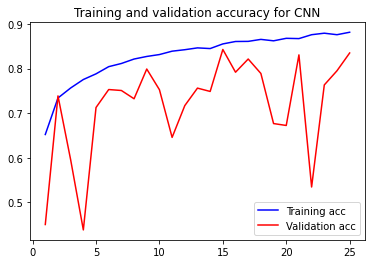

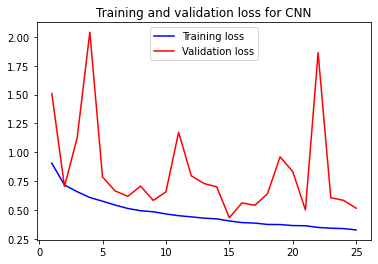

In [ ]:
#plot the learning curves
#getting train and validation accuracies
train_acc_CNN = history.history['accuracy']
val_acc_CNN = history.history['val_accuracy']

#getting train and validation losses
train_loss_CNN = history.history['loss']
val_loss_CNN = history.history['val_loss']
epochs = range(1, len(train_loss_CNN) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

The training loss is decreasing steadily and the validation loss seems to be slightly decreasing but overall stays about the same in general. The lowest the validation loss gets is arouind 29 epochs and it is jumping around. Training accuracy is increasing gradually and validation accuracy is not very far behind it. It does not seem like the model is overfitting.

In [ ]:
#add more convolutional layers, increase channels
#create new model
def build_more_layers(input_shape, filters):
  #input layer
  input = keras.Input(shape=input_shape)
  #rescaling layer for pixels
  x = layers.experimental.preprocessing.Rescaling(1./255)(input)
  #convolutional layers (5) with batchnorm and relu extracting features
  for filter in filters:
    x =layers.Conv2D(filters=filter, kernel_size=3, padding="same", use_bias=False)(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)
  #max pooling for downsampling
  x = layers.MaxPooling2D(pool_size=2, padding="same")(x)
  #GAP
  x = layers.GlobalAveragePooling2D()(x)
  #softmax activation function for a multiclass classification problem with 6 classes
  output=layers.Dense(6, activation="softmax")(x) 
  #create model
  model = keras.Model(inputs=input, outputs=output)
  return model

more_layers=build_more_layers(input_shape=(150,150,3), filters=[16,32,64,128,256]) #added 1 more layers
print(more_layers.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 150, 150, 16)      432       
                                                                 
 batch_normalization_4 (Batc  (None, 150, 150, 16)     64        
 hNormalization)                                                 
                                                                 
 re_lu_4 (ReLU)              (None, 150, 150, 16)      0         
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 32)      4608      
                                                           

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
#using categorical cross entropy for multiclass classification
more_layers.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

#callback for early stopping. stop the training if the validation_loss does not improve after 10 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)

#save the checkpointed model in your google drive cnn_lab directory: "drive/MyDrive/cnn_lab/baseline_checkpoint" . 
checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_lab/morelayers_checkpoint",save_best_only=True, monitor="val_loss")


In [ ]:
history2 = more_layers.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping, checkpoint])

Epoch 1/50
351/351 [==============================] - ETA: 0s - loss: 0.8895 - accuracy: 0.6546

351/351 [==============================] - 27s 74ms/step - loss: 0.8895 - accuracy: 0.6546 - val_loss: 1.4081 - val_accuracy: 0.4982
Epoch 2/50
351/351 [==============================] - ETA: 0s - loss: 0.7152 - accuracy: 0.7329

351/351 [==============================] - 25s 71ms/step - loss: 0.7152 - accuracy: 0.7329 - val_loss: 0.7953 - val_accuracy: 0.6994
Epoch 3/50
351/351 [==============================] - 23s 65ms/step - loss: 0.6508 - accuracy: 0.7586 - val_loss: 0.9371 - val_accuracy: 0.6598
Epoch 4/50
351/351 [==============================] - ETA: 0s - loss: 0.6009 - accuracy: 0.7790

351/351 [==============================] - 25s 70ms/step - loss: 0.6009 - accuracy: 0.7790 - val_loss: 0.5776 - val_accuracy: 0.7953
Epoch 5/50
351/351 [==============================] - 23s 65ms/step - loss: 0.5541 - accuracy: 0.7962 - val_loss: 0.6030 - val_accuracy: 0.7857
Epoch 6/50
351/351 [==============================] - 23s 65ms/step - loss: 0.5395 - accuracy: 0.8057 - val_loss: 1.0622 - val_accuracy: 0.6295
Epoch 7/50
351/351 [==============================] - 23s 65ms/step - loss: 0.5118 - accuracy: 0.8167 - val_loss: 0.7201 - val_accuracy: 0.7154
Epoch 8/50
351/351 [==============================] - 23s 65ms/step - loss: 0.4877 - accuracy: 0.8244 - val_loss: 0.5934 - val_accuracy: 0.7764
Epoch 9/50
351/351 [==============================] - ETA: 0s - loss: 0.4658 - accuracy: 0.8318

351/351 [==============================] - 25s 71ms/step - loss: 0.4658 - accuracy: 0.8318 - val_loss: 0.5436 - val_accuracy: 0.8078
Epoch 10/50
351/351 [==============================] - ETA: 0s - loss: 0.4530 - accuracy: 0.8354

351/351 [==============================] - 25s 70ms/step - loss: 0.4530 - accuracy: 0.8354 - val_loss: 0.5131 - val_accuracy: 0.8010
Epoch 11/50
351/351 [==============================] - 23s 65ms/step - loss: 0.4418 - accuracy: 0.8402 - val_loss: 0.6641 - val_accuracy: 0.7532
Epoch 12/50
351/351 [==============================] - ETA: 0s - loss: 0.4285 - accuracy: 0.8475

351/351 [==============================] - 25s 71ms/step - loss: 0.4285 - accuracy: 0.8475 - val_loss: 0.4791 - val_accuracy: 0.8192
Epoch 13/50
351/351 [==============================] - 23s 65ms/step - loss: 0.4067 - accuracy: 0.8531 - val_loss: 0.8118 - val_accuracy: 0.7111
Epoch 14/50
351/351 [==============================] - 23s 65ms/step - loss: 0.3949 - accuracy: 0.8606 - val_loss: 0.8371 - val_accuracy: 0.6837
Epoch 15/50
351/351 [==============================] - 23s 65ms/step - loss: 0.3896 - accuracy: 0.8610 - val_loss: 0.5960 - val_accuracy: 0.7864
Epoch 16/50
351/351 [==============================] - 23s 65ms/step - loss: 0.3856 - accuracy: 0.8626 - val_loss: 0.5612 - val_accuracy: 0.7928
Epoch 17/50
351/351 [==============================] - 23s 65ms/step - loss: 0.3695 - accuracy: 0.8677 - val_loss: 0.6097 - val_accuracy: 0.7885
Epoch 18/50
351/351 [==============================] - 23s 65ms/step - loss: 0.3700 - accuracy: 0.8682 - val_loss: 0.5806 - val_accuracy: 0.77

In [ ]:
#plot the learning curves
#getting train and validation accuracies
train_acc_CNN2 = history2.history['accuracy']
val_acc_CNN2 = history2.history['val_accuracy']

#getting train and validation losses
train_loss_CNN2 = history2.history['loss']
val_loss_CNN2 = history2.history['val_loss']
epochs = range(1, len(train_loss_CNN2) + 1)

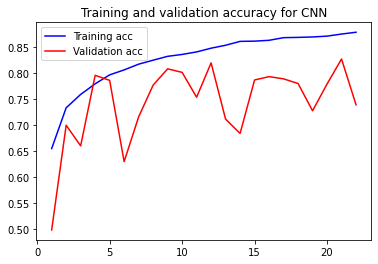

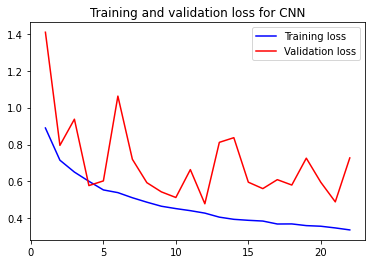

In [ ]:
#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN2, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN2, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN2, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN2, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

It seems like this model is similar to the previous model in that it does not appear to be overfitting because the training loss is still decreasing gradually and training accuracy is still increasing gradually. Also, they are quite close to each other.

In [ ]:
#replace convolutional layers with depth wise seperable convolution and add residual blocks.
def residual_block(x, filter):
  residual = x

  x = layers.SeparableConv2D(filters=filter, kernel_size=3, padding="same", use_bias=False )(x)
  x= layers.BatchNormalization()(x)
  x= layers.ReLU()(x)

  x = layers.SeparableConv2D(filters=filter, kernel_size=3, padding="same", use_bias=False)(x)
  x= layers.BatchNormalization()(x)
  x= layers.ReLU()(x)

  x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

  residual = layers.Conv2D(filters=filter, kernel_size=1, strides=2, use_bias=False)(residual)

  residual= layers.BatchNormalization()(residual)

  x = layers.add([x, residual])
  return x 

In [ ]:
#create new model
def build_conv_layers(input_shape, filters):
  #input layer
  input = keras.Input(shape=input_shape)
  #rescaling layer for pixels
  x = layers.experimental.preprocessing.Rescaling(1./255)(input)
  #convolutional layers (5) with batchnorm and relu extracting features
  for filter in filters:
    x= residual_block(x, filter)
  #GAP
  x = layers.GlobalAveragePooling2D()(x)
  #softmax activation function for a multiclass classification problem with 6 classes
  output=layers.Dense(6, activation="softmax")(x) 
  #create model
  model = keras.Model(inputs=input, outputs=output)
  return model

conv_layers=build_conv_layers(input_shape=(150,150,3), filters=[16,32,64,128,256]) #added 1 more layers
print(conv_layers.summary())

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_2 (Rescaling)        (None, 150, 150, 3)  0           ['input_3[0][0]']                
                                                                                                  
 separable_conv2d (SeparableCon  (None, 150, 150, 16  75         ['rescaling_2[0][0]']            
 v2D)                           )                                                                 
                                                                                            

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
#using categorical cross entropy for multiclass classification
conv_layers.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

#callback for early stopping. stop the training if the validation_loss does not improve after 10 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)

#save the checkpointed model in your google drive cnn_lab directory: "drive/MyDrive/cnn_lab/baseline_checkpoint" . 
checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_lab/convlayers_checkpoint",save_best_only=True, monitor="val_loss")

In [ ]:
history3 = conv_layers.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping, checkpoint])

Epoch 1/50
351/351 [==============================] - ETA: 0s - loss: 0.8199 - accuracy: 0.6898

351/351 [==============================] - 78s 216ms/step - loss: 0.8199 - accuracy: 0.6898 - val_loss: 2.4602 - val_accuracy: 0.1690
Epoch 2/50
351/351 [==============================] - ETA: 0s - loss: 0.5730 - accuracy: 0.7923

351/351 [==============================] - 73s 208ms/step - loss: 0.5730 - accuracy: 0.7923 - val_loss: 0.6177 - val_accuracy: 0.7839
Epoch 3/50
351/351 [==============================] - 67s 191ms/step - loss: 0.4842 - accuracy: 0.8255 - val_loss: 0.9413 - val_accuracy: 0.6883
Epoch 4/50
351/351 [==============================] - 67s 192ms/step - loss: 0.4299 - accuracy: 0.8485 - val_loss: 0.7499 - val_accuracy: 0.7471
Epoch 5/50
351/351 [==============================] - 67s 191ms/step - loss: 0.3760 - accuracy: 0.8665 - val_loss: 0.6366 - val_accuracy: 0.7864
Epoch 6/50
351/351 [==============================] - 68s 194ms/step - loss: 0.3220 - accuracy: 0.8837 - val_loss: 0.8281 - val_accuracy: 0.7404
Epoch 7/50
351/351 [==============================] - 67s 191ms/step - loss: 0.2763 - accuracy: 0.9053 - val_loss: 0.7359 - val_accuracy: 0.7660
Epoch 8/50
351/351 [==============================] - ETA: 0s - loss: 0.2517 - accuracy: 0.9110

351/351 [==============================] - 73s 209ms/step - loss: 0.2517 - accuracy: 0.9110 - val_loss: 0.5927 - val_accuracy: 0.7992
Epoch 9/50
351/351 [==============================] - 68s 193ms/step - loss: 0.2115 - accuracy: 0.9279 - val_loss: 0.7912 - val_accuracy: 0.7689
Epoch 10/50
351/351 [==============================] - 68s 193ms/step - loss: 0.1727 - accuracy: 0.9423 - val_loss: 0.6369 - val_accuracy: 0.8067
Epoch 11/50
351/351 [==============================] - 68s 192ms/step - loss: 0.1578 - accuracy: 0.9459 - val_loss: 0.7182 - val_accuracy: 0.7985
Epoch 12/50
351/351 [==============================] - 67s 192ms/step - loss: 0.1300 - accuracy: 0.9595 - val_loss: 0.7400 - val_accuracy: 0.7932
Epoch 13/50
351/351 [==============================] - 68s 192ms/step - loss: 0.1042 - accuracy: 0.9671 - val_loss: 0.9396 - val_accuracy: 0.7732
Epoch 14/50
351/351 [==============================] - 67s 191ms/step - loss: 0.0915 - accuracy: 0.9729 - val_loss: 0.9970 - val_accuracy

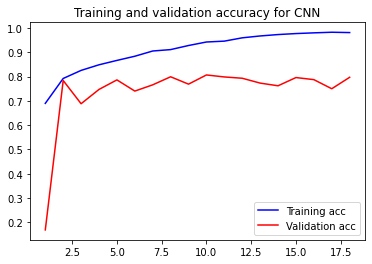

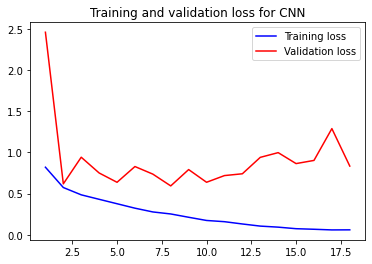

In [ ]:
#plot the learning curves
#getting train and validation accuracies
train_acc_CNN3 = history3.history['accuracy']
val_acc_CNN3 = history3.history['val_accuracy']

#getting train and validation losses
train_loss_CNN3 = history3.history['loss']
val_loss_CNN3 = history3.history['val_loss']
epochs = range(1, len(train_loss_CNN3) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN3, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN3, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN3, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN3, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

It looks as thought the validation accuracy starts lowering after a while and the validation loss starts increasing after a while. The training accuracy still is gradually increasing but looks like it starts flattening out and the training loss is also doing the same. The training and validation lines are further apart now.

In [ ]:
#use data augmentation with the base model
def data_augmentation(x):
  x= layers.experimental.preprocessing.RandomFlip("horizontal")(x)
  x=layers.experimental.preprocessing.RandomRotation(0.1)(x)
  x=layers.experimental.preprocessing.RandomZoom(0.2)(x)
  return x

In [ ]:
#create a baseline CNN model
def build_baseline_with_aug(input_shape, filters):
  input = keras.Input(shape=input_shape)
  x = data_augmentation(input)
  x = layers.experimental.preprocessing.Rescaling(1./255)(input)

  for filter in filters:
    x =layers.Conv2D(filters=filter, kernel_size=3, padding="same", use_bias=False)(x)
    x= layers.BatchNormalization()(x)
    x= layers.ReLU()(x)

  x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

  x = layers.GlobalAveragePooling2D()(x)

  output=layers.Dense(6, activation="softmax")(x) #softmax activation function for a multiclass classification problem

  model = keras.Model(inputs=input, outputs=output)
  return model

baseline_with_aug=build_baseline_with_aug(input_shape=(150,150,3), filters=[32,64,128,256])
print(baseline_with_aug.summary())

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 rescaling_3 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 150, 150, 32)      864       
                                                                 
 batch_normalization_24 (Bat  (None, 150, 150, 32)     128       
 chNormalization)                                                
                                                                 
 re_lu_19 (ReLU)             (None, 150, 150, 32)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 150, 150, 64)      18432     
                                                           

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-3,
    decay_steps=1000,
    decay_rate=0.9)

#compiling the model
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
#using categorical cross entropy for multiclass classification
baseline_with_aug.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)

#callback for early stopping. stop the training if the validation_loss does not improve after 10 epochs
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)

#save the checkpointed model in your google drive cnn_lab directory: "drive/MyDrive/cnn_lab/baseline_checkpoint" . 
checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_lab/baselineaug_checkpoint",save_best_only=True, monitor="val_loss")

In [ ]:
history4 = baseline_with_aug.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping, checkpoint])

Epoch 1/50
351/351 [==============================] - ETA: 0s - loss: 0.8914 - accuracy: 0.6579

351/351 [==============================] - 25s 69ms/step - loss: 0.8914 - accuracy: 0.6579 - val_loss: 1.2015 - val_accuracy: 0.5111
Epoch 2/50
351/351 [==============================] - ETA: 0s - loss: 0.7183 - accuracy: 0.7335

351/351 [==============================] - 23s 66ms/step - loss: 0.7183 - accuracy: 0.7335 - val_loss: 0.8546 - val_accuracy: 0.6797
Epoch 3/50
350/351 [============================>.] - ETA: 0s - loss: 0.6462 - accuracy: 0.7634

351/351 [==============================] - 24s 67ms/step - loss: 0.6468 - accuracy: 0.7632 - val_loss: 0.7795 - val_accuracy: 0.6958
Epoch 4/50
350/351 [============================>.] - ETA: 0s - loss: 0.6018 - accuracy: 0.7807

351/351 [==============================] - 23s 66ms/step - loss: 0.6016 - accuracy: 0.7810 - val_loss: 0.6802 - val_accuracy: 0.7404
Epoch 5/50
351/351 [==============================] - 22s 61ms/step - loss: 0.5548 - accuracy: 0.7954 - val_loss: 1.1554 - val_accuracy: 0.6280
Epoch 6/50
351/351 [==============================] - 22s 61ms/step - loss: 0.5238 - accuracy: 0.8102 - val_loss: 0.7748 - val_accuracy: 0.7104
Epoch 7/50
351/351 [==============================] - ETA: 0s - loss: 0.5054 - accuracy: 0.8188

351/351 [==============================] - 23s 66ms/step - loss: 0.5054 - accuracy: 0.8188 - val_loss: 0.6729 - val_accuracy: 0.7536
Epoch 8/50
351/351 [==============================] - 22s 61ms/step - loss: 0.4894 - accuracy: 0.8226 - val_loss: 0.7011 - val_accuracy: 0.7357
Epoch 9/50
351/351 [==============================] - 21s 61ms/step - loss: 0.4783 - accuracy: 0.8281 - val_loss: 0.7054 - val_accuracy: 0.7461
Epoch 10/50
351/351 [==============================] - 21s 61ms/step - loss: 0.4566 - accuracy: 0.8369 - val_loss: 0.7727 - val_accuracy: 0.7165
Epoch 11/50
351/351 [==============================] - 22s 61ms/step - loss: 0.4442 - accuracy: 0.8414 - val_loss: 1.0895 - val_accuracy: 0.6155
Epoch 12/50
351/351 [==============================] - 21s 61ms/step - loss: 0.4378 - accuracy: 0.8436 - val_loss: 0.7090 - val_accuracy: 0.7236
Epoch 13/50
351/351 [==============================] - ETA: 0s - loss: 0.4230 - accuracy: 0.8491

351/351 [==============================] - 23s 67ms/step - loss: 0.4230 - accuracy: 0.8491 - val_loss: 0.5228 - val_accuracy: 0.7999
Epoch 14/50
351/351 [==============================] - 22s 61ms/step - loss: 0.4126 - accuracy: 0.8506 - val_loss: 0.5471 - val_accuracy: 0.7889
Epoch 15/50
351/351 [==============================] - 22s 61ms/step - loss: 0.4025 - accuracy: 0.8557 - val_loss: 0.5653 - val_accuracy: 0.7832
Epoch 16/50
351/351 [==============================] - 21s 61ms/step - loss: 0.3950 - accuracy: 0.8541 - val_loss: 0.6006 - val_accuracy: 0.7678
Epoch 17/50
351/351 [==============================] - ETA: 0s - loss: 0.3793 - accuracy: 0.8630

351/351 [==============================] - 23s 66ms/step - loss: 0.3793 - accuracy: 0.8630 - val_loss: 0.5152 - val_accuracy: 0.8163
Epoch 18/50
351/351 [==============================] - 22s 61ms/step - loss: 0.3726 - accuracy: 0.8622 - val_loss: 0.5652 - val_accuracy: 0.8081
Epoch 19/50
351/351 [==============================] - 21s 61ms/step - loss: 0.3758 - accuracy: 0.8640 - val_loss: 0.6767 - val_accuracy: 0.7457
Epoch 20/50
351/351 [==============================] - 21s 61ms/step - loss: 0.3638 - accuracy: 0.8679 - val_loss: 0.6166 - val_accuracy: 0.7607
Epoch 21/50
351/351 [==============================] - 22s 61ms/step - loss: 0.3505 - accuracy: 0.8753 - val_loss: 0.6260 - val_accuracy: 0.7632
Epoch 22/50
351/351 [==============================] - 22s 61ms/step - loss: 0.3462 - accuracy: 0.8753 - val_loss: 0.6990 - val_accuracy: 0.7400
Epoch 23/50
351/351 [==============================] - ETA: 0s - loss: 0.3404 - accuracy: 0.8754

351/351 [==============================] - 23s 66ms/step - loss: 0.3404 - accuracy: 0.8754 - val_loss: 0.3917 - val_accuracy: 0.8577
Epoch 24/50
351/351 [==============================] - 21s 61ms/step - loss: 0.3337 - accuracy: 0.8804 - val_loss: 0.5412 - val_accuracy: 0.7850
Epoch 25/50
351/351 [==============================] - 21s 61ms/step - loss: 0.3297 - accuracy: 0.8807 - val_loss: 0.5027 - val_accuracy: 0.8071
Epoch 26/50
351/351 [==============================] - 21s 61ms/step - loss: 0.3234 - accuracy: 0.8820 - val_loss: 0.6796 - val_accuracy: 0.7650
Epoch 27/50
351/351 [==============================] - 22s 61ms/step - loss: 0.3162 - accuracy: 0.8852 - val_loss: 0.4789 - val_accuracy: 0.8228
Epoch 28/50
351/351 [==============================] - 21s 61ms/step - loss: 0.3102 - accuracy: 0.8909 - val_loss: 0.8039 - val_accuracy: 0.7101
Epoch 29/50
351/351 [==============================] - 21s 61ms/step - loss: 0.3032 - accuracy: 0.8920 - val_loss: 0.6003 - val_accuracy: 0.78

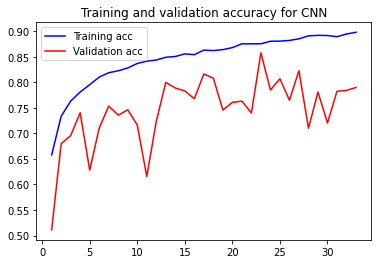

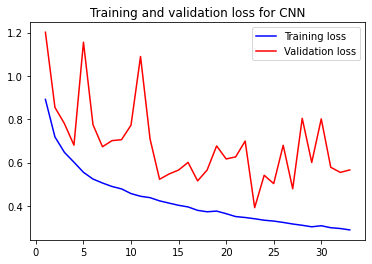

In [ ]:
#getting train and validation accuracies
train_acc_CNN4 = history4.history['accuracy']
val_acc_CNN4 = history4.history['val_accuracy']

#getting train and validation losses
train_loss_CNN4 = history4.history['loss']
val_loss_CNN4 = history4.history['val_loss']
epochs = range(1, len(train_loss_CNN4) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN4, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN4, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN4, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN4, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

This model improved the validation loss. It resulted in the lowest validation loss out of all the models so far.

In [ ]:
#apply transfer learning
#instantiate a DenseNet
from tensorflow.keras.applications import DenseNet121
conv_base = DenseNet121(weights='imagenet',include_top=False, input_shape=(150, 150, 3))
#freeze the weight of the convolutional base so that the representations that were previously learned by the convolutional base will not be modified
conv_base.trainable=False
#summary
conv_base.summary()

29084464/29084464 [==============================] - 0s 0us/step
Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 156, 156, 3)  0          ['input_5[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 75, 75, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormali

In [ ]:
def build_pretrained(input_shape):
  input = keras.Input(shape=input_shape)
  x=data_augmentation(input)
  x = layers.experimental.preprocessing.Rescaling(1./255)(x)
  x = conv_base(x)
  x = layers.GlobalAveragePooling2D()(x)

  output=layers.Dense(6, activation="softmax")(x)

  model = keras.Model(inputs=input, outputs=output)
  return model

pretrained_model=build_pretrained(input_shape=(150,150,3))
print(pretrained_model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 150, 150, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 150, 150, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                           

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
pretrained_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)
checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_lab/pretrained_checkpoint",save_best_only=True, monitor="val_loss")


history5 = pretrained_model.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping])

Epoch 1/50
351/351 [==============================] - 25s 51ms/step - loss: 0.6119 - accuracy: 0.7771 - val_loss: 0.3515 - val_accuracy: 0.8698
Epoch 2/50
351/351 [==============================] - 15s 42ms/step - loss: 0.3907 - accuracy: 0.8572 - val_loss: 0.3040 - val_accuracy: 0.8862
Epoch 3/50
351/351 [==============================] - 15s 42ms/step - loss: 0.3566 - accuracy: 0.8690 - val_loss: 0.2805 - val_accuracy: 0.8969
Epoch 4/50
351/351 [==============================] - 15s 41ms/step - loss: 0.3386 - accuracy: 0.8753 - val_loss: 0.2730 - val_accuracy: 0.9016
Epoch 5/50
351/351 [==============================] - 15s 41ms/step - loss: 0.3291 - accuracy: 0.8793 - val_loss: 0.2937 - val_accuracy: 0.8944
Epoch 6/50
351/351 [==============================] - 15s 42ms/step - loss: 0.3201 - accuracy: 0.8821 - val_loss: 0.2777 - val_accuracy: 0.9016
Epoch 7/50
351/351 [==============================] - 15s 42ms/step - loss: 0.3218 - accuracy: 0.8823 - val_loss: 0.2694 - val_accuracy:

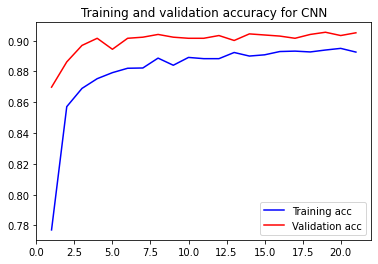

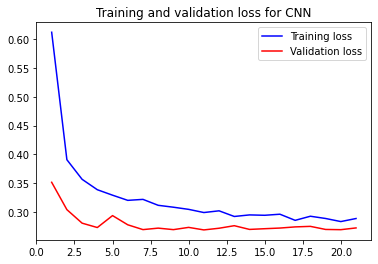

In [ ]:

#getting train and validation accuracies
train_acc_CNN5 = history5.history['accuracy']
val_acc_CNN5 = history5.history['val_accuracy']

#getting train and validation losses
train_loss_CNN5 = history5.history['loss']
val_loss_CNN5 = history5.history['val_loss']
epochs = range(1, len(train_loss_CNN5) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN5, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN5, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN5, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN5, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

This model achieved an even lower validation loss than the models before and it looks like it also reached the highest validation accuracy.

In [ ]:
#fine tuning
#unfreeze the convolution base
conv_base.trainable = True

#set trainable to False for all layers except the last 9 (last 9 layers are the last convolutional block)
for layer in conv_base.layers[:-9]:
    layer.trainable=False

#set trainable to True for the convolutional layers in the last 9 layers
for layer in conv_base.layers[-9:]:
    if layer.name.endswith("conv"):
      layer.trainable=True

print(pretrained_model.summary())

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 random_flip_1 (RandomFlip)  (None, 150, 150, 3)       0         
                                                                 
 random_rotation_1 (RandomRo  (None, 150, 150, 3)      0         
 tation)                                                         
                                                                 
 random_zoom_1 (RandomZoom)  (None, 150, 150, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 150, 150, 3)       0         
                                                                 
 densenet121 (Functional)    (None, 4, 4, 1024)        7037504   
                                                           

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)
pretrained_model.compile(loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=opt)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=1e-4, restore_best_weights=True)
checkpoint= keras.callbacks.ModelCheckpoint( filepath="drive/MyDrive/cnn_lab/pretrained_checkpoint",save_best_only=True, monitor="val_loss")

history6 = pretrained_model.fit(
            train_dataset,
            validation_data = validation_dataset,
            epochs = 50,
            verbose = 1,
            callbacks=[early_stopping])

Epoch 1/50
351/351 [==============================] - 25s 50ms/step - loss: 0.2700 - accuracy: 0.9043 - val_loss: 0.3431 - val_accuracy: 0.8927
Epoch 2/50
351/351 [==============================] - 15s 44ms/step - loss: 0.2437 - accuracy: 0.9093 - val_loss: 0.3213 - val_accuracy: 0.8994
Epoch 3/50
351/351 [==============================] - 15s 44ms/step - loss: 0.2313 - accuracy: 0.9150 - val_loss: 0.3037 - val_accuracy: 0.9026
Epoch 4/50
351/351 [==============================] - 15s 43ms/step - loss: 0.2166 - accuracy: 0.9195 - val_loss: 0.3136 - val_accuracy: 0.9005
Epoch 5/50
351/351 [==============================] - 15s 43ms/step - loss: 0.1945 - accuracy: 0.9290 - val_loss: 0.3170 - val_accuracy: 0.9012
Epoch 6/50
351/351 [==============================] - 15s 43ms/step - loss: 0.1938 - accuracy: 0.9288 - val_loss: 0.3210 - val_accuracy: 0.9055
Epoch 7/50
351/351 [==============================] - 15s 43ms/step - loss: 0.1877 - accuracy: 0.9280 - val_loss: 0.3017 - val_accuracy:

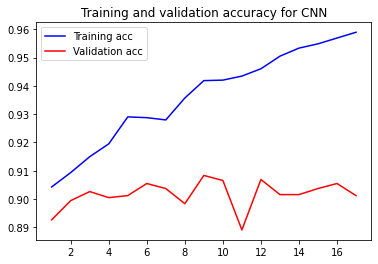

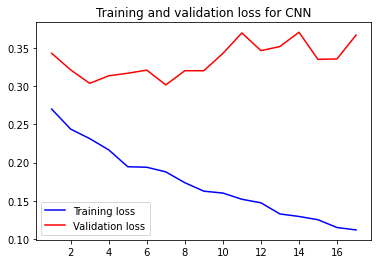

In [ ]:
#getting train and validation accuracies
train_acc_CNN6 = history6.history['accuracy']
val_acc_CNN6 = history6.history['val_accuracy']

#getting train and validation losses
train_loss_CNN6 = history6.history['loss']
val_loss_CNN6 = history6.history['val_loss']
epochs = range(1, len(train_loss_CNN6) + 1)

#plotting the training and validation accurracies
plt.plot(epochs, train_acc_CNN6, 'b', label='Training acc')
plt.plot(epochs, val_acc_CNN6, 'r', label='Validation acc')
plt.title('Training and validation accuracy for CNN')
plt.legend()
plt.figure()

#plotting the train and validaiton losses
plt.plot(epochs, train_loss_CNN6, 'b', label='Training loss')
plt.plot(epochs, val_loss_CNN6, 'r', label='Validation loss')
plt.title('Training and validation loss for CNN')
plt.legend()

plt.show()

In [ ]:
#create tf.data.datasets for seg_test
test_dataset = image_dataset_from_directory(
  "intel/seg_test",
  image_size=(150, 150),
  batch_size=32,
  shuffle = False)

Found 3000 files belonging to 6 classes.


In [ ]:
test_loss, test_acc = pretrained_model.evaluate(test_dataset)
print('test acc: ', test_acc)

94/94 [==============================] - 3s 28ms/step - loss: 0.2868 - accuracy: 0.8940
test acc:  0.8939999938011169


In [ ]:
#get the predicted labels/classes for each image in the test data and compare it to the true labels for each target class

#predicterd probabilities for each image in test data
predicted_probabilities = pretrained_model.predict(test_dataset)
#index of the classwith maximum predicted probability for each image
max_predictions = np.argmax(predicted_probabilities, axis=1)
# true class indices for the test data
true_class_indices = np.concatenate([y for x, y in test_dataset], axis=0)

94/94 [==============================] - 2s 22ms/step


In [ ]:
#confusion matrix
import sklearn
from sklearn import metrics
sklearn.metrics.confusion_matrix(true_class_indices, max_predictions)

array([[392,   3,   2,   1,   2,  37],
       [  0, 469,   2,   1,   0,   2],
       [  1,   4, 446,  74,  27,   1],
       [  2,   1,  64, 438,  20,   0],
       [  4,   2,   9,   6, 488,   1],
       [ 49,   0,   0,   0,   3, 449]])

In [ ]:
#savng the modle on disk
pretrained_model.save("drive/MyDrive/assignment3/finetuned.h5")

It looks like the model most misclassified mountains/glaciers, buildings/street, glacier/sea

1/1 [==============================] - 2s 2s/step
True label is: 1, CNN predicted 0.0 with confidence 0.9999152004384086


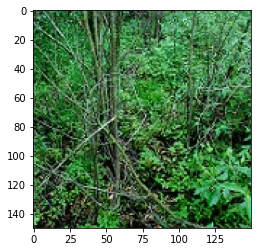

1/1 [==============================] - 0s 35ms/step
True label is: 1, CNN predicted 0.0 with confidence 0.9999380837834906


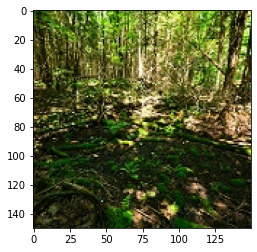

1/1 [==============================] - 0s 37ms/step
True label is: 2, CNN predicted 0.0 with confidence 0.9996962578734383


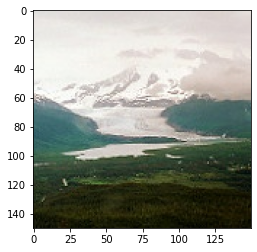

1/1 [==============================] - 0s 37ms/step
True label is: 3, CNN predicted 0.0 with confidence 0.9999994854035776


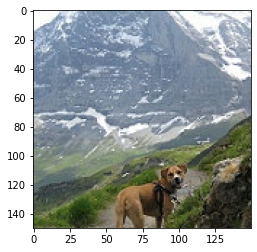

1/1 [==============================] - 0s 34ms/step
True label is: 3, CNN predicted 0.0 with confidence 0.9999797024156578


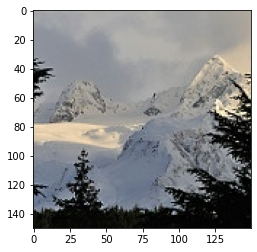

1/1 [==============================] - 0s 37ms/step
True label is: 0, CNN predicted 1.0 with confidence 0.9935613870620728


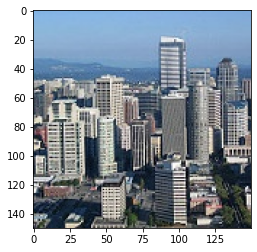

1/1 [==============================] - 0s 35ms/step
True label is: 4, CNN predicted 0.0 with confidence 0.9999928178908704


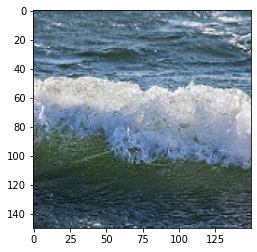

1/1 [==============================] - 0s 35ms/step
True label is: 3, CNN predicted 0.0 with confidence 0.9999139081555768


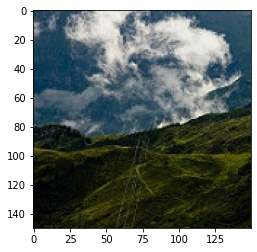

1/1 [==============================] - 0s 37ms/step
True label is: 2, CNN predicted 0.0 with confidence 0.9999999613404924


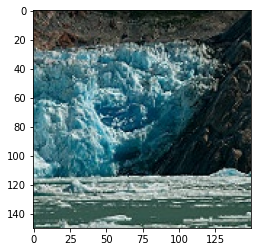

1/1 [==============================] - 0s 35ms/step
True label is: 5, CNN predicted 0.0 with confidence 0.982537355273962


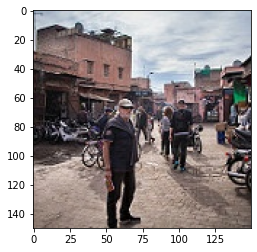

1/1 [==============================] - 0s 36ms/step
True label is: 5, CNN predicted 1.0 with confidence 0.6612883806228638


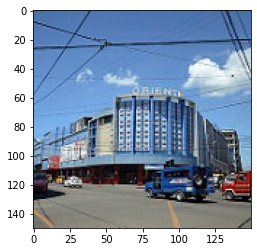

1/1 [==============================] - 0s 34ms/step
True label is: 5, CNN predicted 0.0 with confidence 0.968522198498249


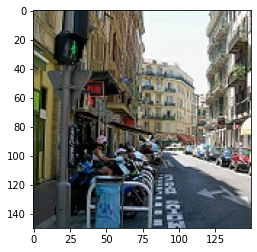

1/1 [==============================] - 0s 39ms/step
True label is: 2, CNN predicted 0.0 with confidence 0.9999996053309985


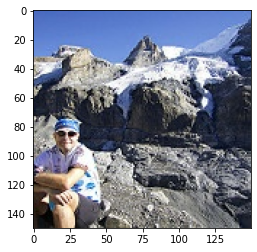

1/1 [==============================] - 0s 36ms/step
True label is: 3, CNN predicted 0.0 with confidence 0.9998796611616854


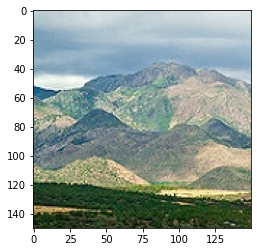

1/1 [==============================] - 0s 40ms/step
True label is: 5, CNN predicted 1.0 with confidence 0.7093307971954346


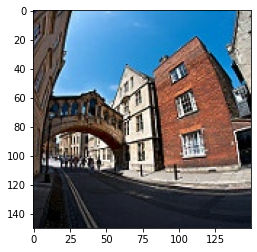

1/1 [==============================] - 0s 36ms/step
True label is: 5, CNN predicted 0.0 with confidence 0.9942939546890557


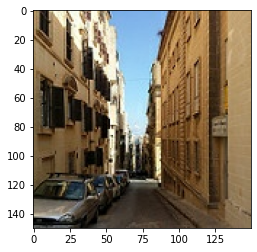

1/1 [==============================] - 0s 34ms/step
True label is: 5, CNN predicted 0.0 with confidence 0.9889815794304013


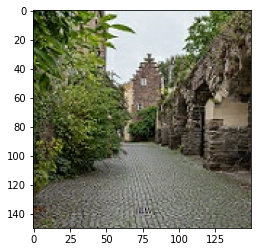

1/1 [==============================] - 0s 37ms/step
True label is: 1, CNN predicted 0.0 with confidence 0.9995093467878178


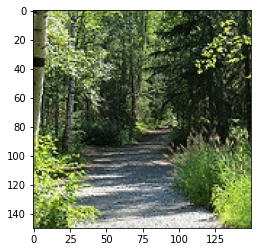

1/1 [==============================] - 0s 35ms/step
True label is: 2, CNN predicted 0.0 with confidence 0.9999946058237583


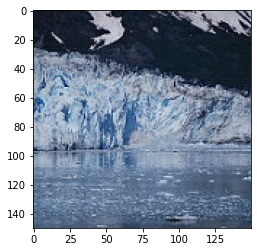

1/1 [==============================] - 0s 36ms/step
True label is: 0, CNN predicted 1.0 with confidence 0.981063961982727


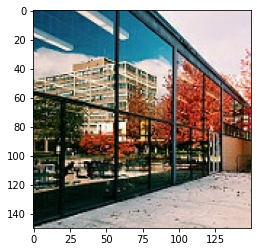

1/1 [==============================] - 0s 43ms/step
True label is: 3, CNN predicted 0.0 with confidence 0.9999824283277121


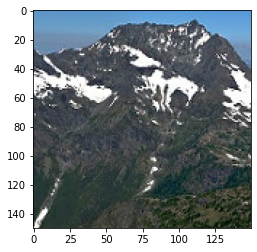

1/1 [==============================] - 0s 39ms/step
True label is: 2, CNN predicted 0.0 with confidence 0.9999755035532871


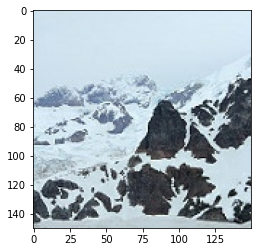

1/1 [==============================] - 0s 35ms/step
True label is: 2, CNN predicted 0.0 with confidence 0.9980715976562351


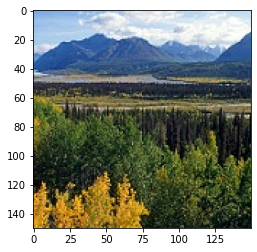

1/1 [==============================] - 0s 39ms/step
True label is: 3, CNN predicted 0.0 with confidence 0.9998500419169432


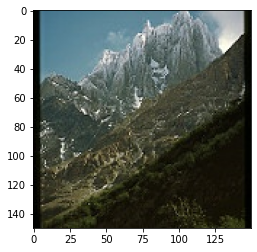

1/1 [==============================] - 0s 36ms/step
True label is: 4, CNN predicted 0.0 with confidence 0.9999992390754073


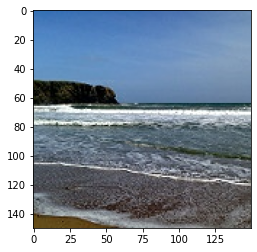

1/1 [==============================] - 0s 39ms/step
True label is: 3, CNN predicted 0.0 with confidence 0.9999892242794886


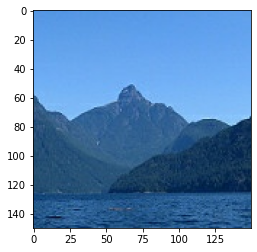

1/1 [==============================] - 0s 36ms/step
True label is: 3, CNN predicted 0.0 with confidence 0.9995510453009047


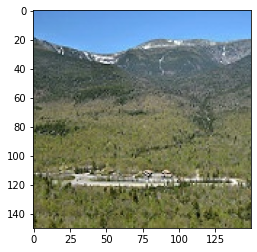

1/1 [==============================] - 0s 38ms/step
True label is: 1, CNN predicted 0.0 with confidence 0.999992596931861


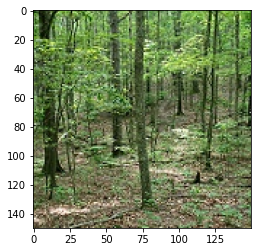

1/1 [==============================] - 0s 35ms/step
True label is: 3, CNN predicted 0.0 with confidence 0.9992844453081489


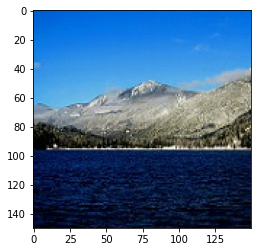

1/1 [==============================] - 0s 36ms/step
True label is: 2, CNN predicted 0.0 with confidence 0.9999849160140002


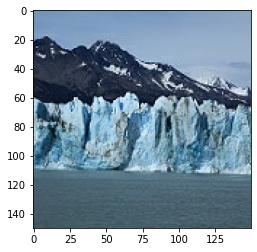

1/1 [==============================] - 0s 35ms/step
True label is: 5, CNN predicted 0.0 with confidence 0.9958936884067953


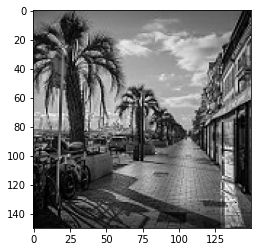

1/1 [==============================] - 0s 40ms/step
True label is: 4, CNN predicted 0.0 with confidence 0.999936682455882


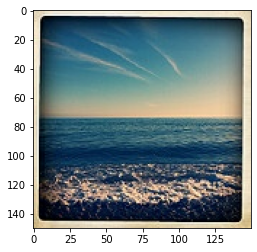

1/1 [==============================] - 0s 35ms/step
True label is: 3, CNN predicted 0.0 with confidence 0.9999479220823559


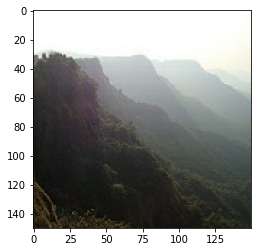

In [ ]:
#visualize some misclassified images in categories where the model struggled with 

batch_size=32
validation_size=1000
batch_index=0
#Get each batch of images and labels in validation dataset
for image_batch,label_batch in validation_dataset:
    if batch_index>math.ceil(validation_size/batch_size):
        break;
    # Get the predicted probabilities for the images in the batch. It will return a numpy array of shape (1, batch_size), so flatten it to a vector
    y_pred = pretrained_model.predict(image_batch).flatten()
    
    # If a predicted probability for an image is >0.5, set the predicted label to 1 otherwise to zero
    y_pred_label=np.where(y_pred>0.5,1.,0.)
    
    #get the indices of the missclassified images in the batch
    errors = np.where(y_pred_label != label_batch)[0]
    
    #display the missclassified images together with their predicted probabilities
    for i in errors:
        print(f"True label is: {label_batch[i]}, CNN predicted {y_pred_label[i]} with confidence {y_pred[i] if y_pred_label[i]==1.0 else 1-y_pred[i]}")
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.show()
        
    #get the next batch
    batch_index=batch_index+1

I took a look at one of the most upvoted related notebooks on Kaggle that was linked with the dataset. 
https://www.kaggle.com/code/vincee/intel-image-classification-cnn-keras
Vincent Liu's model only used two Conv2D layers with max pooling layer, but no global average pooling. He used optimizer with adam. He ended up getting a testing accuracy of 78% which is much lower than our 89%. I think he would have achieved a higher accuracy with more layers. I believe that our accuracy is much better because we used the pre-trained model as well.
Then I looked at a different notebook that achieved a higher accuracy: https://www.kaggle.com/code/arbazkhan971/image-classification-using-cnn-94-accuracy
This person used ResNet18 pretrained CNN model and ended up with a 94% accuracy!

In [ ]:
#added by Ellie Buxton, correct answer to question 6. visualize missclassified images:
#create a dictionary for label names.
batch_size=32
test_size=3000
batch_index=0
#Get each batch of images and labels in validation dataset
for image_batch,label_batch in test_dataset:
    if batch_index>math.ceil(test_size/batch_size):
        break;
    # Get the predicted probabilities for the images in the batch. It will return a numpy array of shape (1, batch_size), so flatten it to a vector
    y_pred = pretrained_model.predict(image_batch)
  
    # get the label with highest probability for each sample in the test set
    y_pred_labels=np.argmax(y_pred, axis=1)

    #label names
    names= ['Buildings','Forest','Glacier', 'Mountain', 'Sea', 'Street']
    
    #get the indices of the missclassified images in the batch
    errors = np.where(y_pred_labels != label_batch)[0]

    
    
    #display the missclassified images together with their predicted probabilities
    for i in errors:
        true_class= label_batch[i]
        predicted_class= y_pred_labels[i]
        print(f"True label is: {names[true_class]}, CNN predicted {names[predicted_class]} with confidence {y_pred[i,predicted_class]}")
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.show()
        
    #get the next batch
    batch_index=batch_index+1